In [3]:
# Confidence Interval Analysis for IQ Scores

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

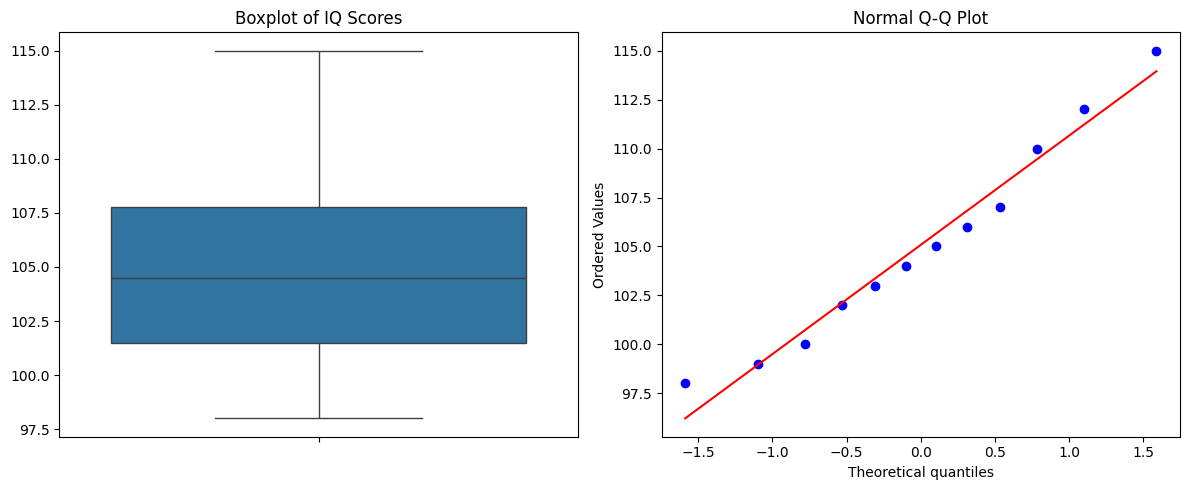

In [4]:
# Sample data
iq_scores = np.array([105, 112, 99, 115, 102, 107, 110, 103, 98, 106, 100, 104])
n = len(iq_scores)

# (a) Boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=iq_scores)
plt.title("Boxplot of IQ Scores")



# (b) Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(iq_scores, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.tight_layout()
plt.show()

The points lie approximately along the line, so it's plausible that the data is normally distributed.

In [5]:
# (c) Sample Mean and Variance Estimators
mean_iq = np.mean(iq_scores)
mle_variance = np.var(iq_scores, ddof=0)
unbiased_variance = np.var(iq_scores, ddof=1)
std_dev = np.sqrt(unbiased_variance)

print("Sample Mean:", mean_iq)
print("MLE Variance:", mle_variance)
print("Unbiased Variance:", unbiased_variance)


Sample Mean: 105.08333333333333
MLE Variance: 25.243055555555554
Unbiased Variance: 27.537878787878785


In [6]:
# (d) 95% Confidence Interval
alpha_95 = 0.05
t_critical_95 = stats.t.ppf(1 - alpha_95/2, df=n-1)
margin_of_error_95 = t_critical_95 * std_dev / np.sqrt(n)
ci_95 = (mean_iq - margin_of_error_95, mean_iq + margin_of_error_95)
print("95% Confidence Interval:", ci_95)

95% Confidence Interval: (np.float64(101.74913267171365), np.float64(108.417533994953))


# (e) 99% vs 95% CI
A 99% CI would be wider than the 95% CI.

Reason: To be more confident (99% sure), you need to account for more of the sampling distribution, which increases the margin of error.

# (f) If sample size increased to 30
The width of the CI would decrease.

Larger samples reduce the standard error (s/underoot(n))

# (g) What a 95% CI Really Means
Correct Interpretation:

If we repeated the sampling process many times, about 95% of the resulting confidence intervals would contain the true mean μ.

Common Misconceptions:

"There is a 95% chance that μ is in this interval"

In [7]:
# (e) 99% Confidence Interval
alpha_99 = 0.01
t_critical_99 = stats.t.ppf(1 - alpha_99/2, df=n-1)
margin_of_error_99 = t_critical_99 * std_dev / np.sqrt(n)
ci_99 = (mean_iq - margin_of_error_99, mean_iq + margin_of_error_99)
print("99% Confidence Interval:", ci_99)

# (f) 95% CI with Sample Size Increased to 30
n_larger = 30
margin_of_error_larger_sample = t_critical_95 * std_dev / np.sqrt(n_larger)
ci_95_larger_sample = (mean_iq - margin_of_error_larger_sample, mean_iq + margin_of_error_larger_sample)
print("95% CI with n=30:", ci_95_larger_sample)

99% Confidence Interval: (np.float64(100.37844829967709), np.float64(109.78821836698957))
95% CI with n=30: (np.float64(102.97459967998162), np.float64(107.19206698668503))
